# Weapons and perpetrators
- Who is making the attacks? Group name of terrorists, number of perpetrators
- What weapon is used to do the attack? Plot, bar graph

## Filtering Dataset

In [1]:
import pandas as pd
import numpy as np

# Transform the data from xlsx to csv
# Replace 'Sheet1' with the actual sheet name from the Excel filed
df = pd.read_excel('../../data/globalterrorismdb_0522dist.xlsx', sheet_name='Data')
df.to_csv('../../data/globalterrorismdb_0522dist.csv', index=False)

## Read in data

In [3]:
df = pd.read_csv('../../data/globalterrorismdb_0522dist.csv', low_memory=False)

df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


## Filter out long entries

In [9]:
print(f"Number of unique weapon types: {len(weapon_types)}")

df['weaptype1_txt'] = df['weaptype1_txt'].replace('Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)', 'Vehicle')

Number of unique weapon types: 12


# Bar Chart of Top 20 Perpetrator Groups (Static)

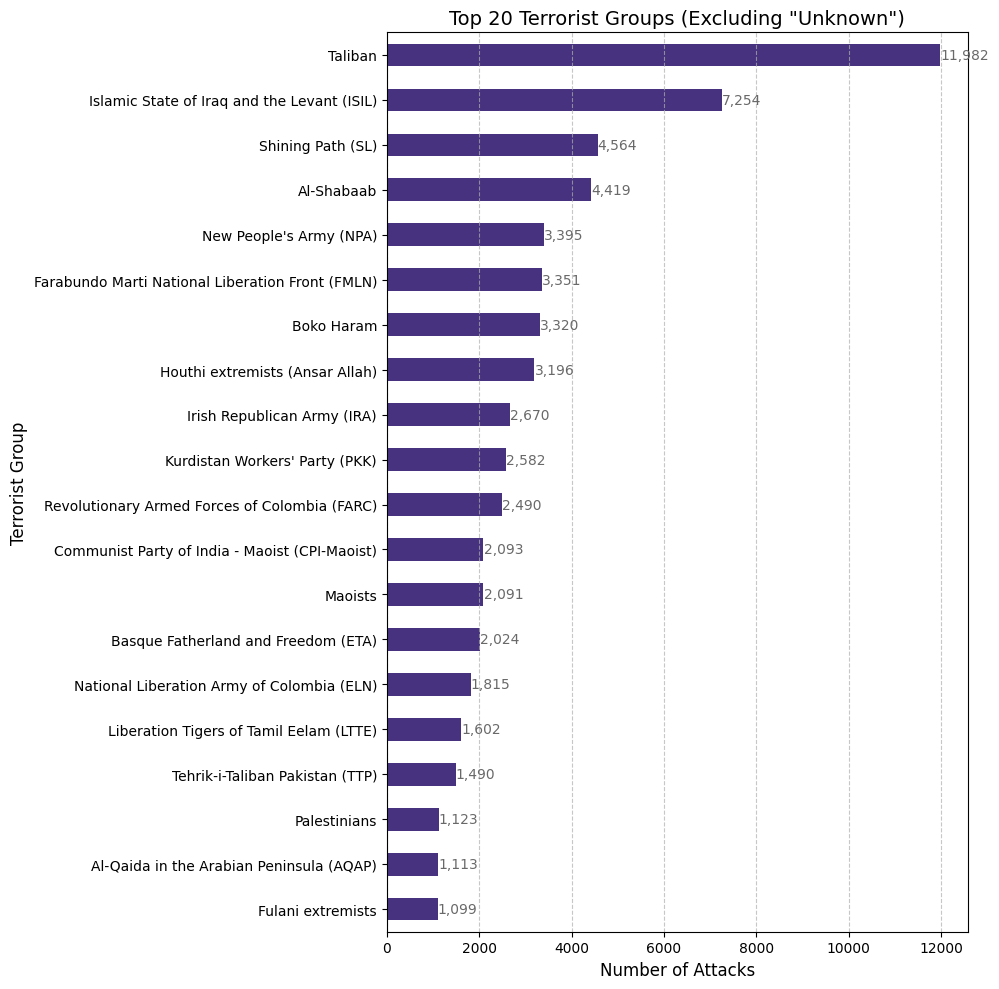

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  # For nicer color palettes

# Assuming your DataFrame is named 'df'

top_n_groups = 20
group_counts = df['gname'].value_counts()
filtered_groups = group_counts[group_counts.index != "Unknown"].nlargest(top_n_groups).iloc[::-1]

plt.figure(figsize=(10, 10))  # Adjust figure size for better aspect ratio
sns.set_palette("viridis")  # Use a nicer color palette from seaborn
bars = filtered_groups.plot(kind='barh', edgecolor='none')  # Remove bar edges
plt.title(f'Top {top_n_groups} Terrorist Groups (Excluding "Unknown")', fontsize=14)
plt.xlabel('Number of Attacks', fontsize=12)
plt.ylabel('Terrorist Group', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='x', linestyle='--', alpha=0.7)  # Add a subtle horizontal grid

# Add number of data points beside each bar with better formatting
for bar in bars.patches:
    xval = bar.get_width()
    plt.text(xval + 3, bar.get_y() + bar.get_height()/2, f'{int(xval):,}', ha='left', va='center', fontsize=10, color='dimgray') # Formatted integer

plt.tight_layout()
plt.show()

# Bar Chart of Weapon Types (Static)

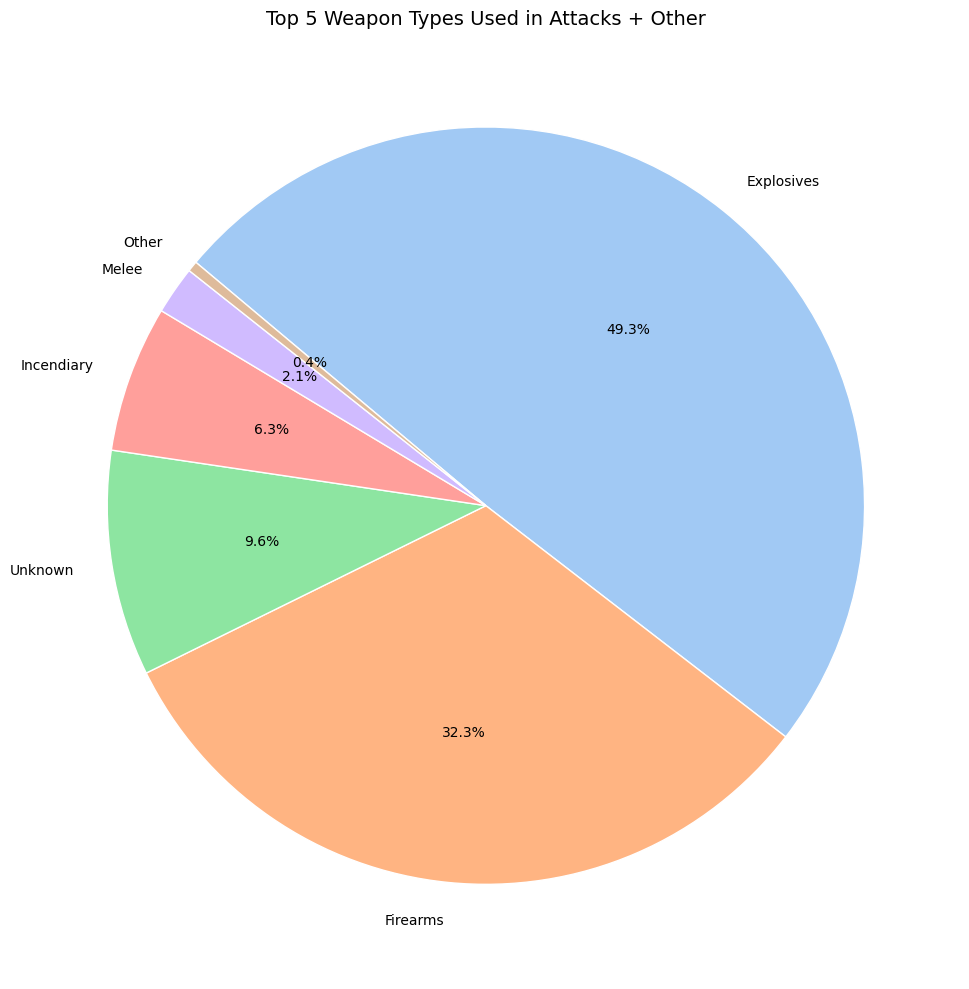

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Count weapon types
weapon_counts = df['weaptype1_txt'].value_counts()

# Get top 5 weapon types
top_n = 5
top_weapons = weapon_counts.nlargest(top_n)

# Sum the rest as "Other"
other_total = weapon_counts.iloc[top_n:].sum()

# Combine top 5 with "Other" using pd.concat
combined_counts = pd.concat([top_weapons, pd.Series({'Other': other_total})])

# Plot
plt.figure(figsize=(10, 10))
colors = sns.color_palette("pastel", len(combined_counts))

plt.pie(combined_counts,
        labels=combined_counts.index,
        colors=colors,
        autopct='%1.1f%%',
        startangle=140,
        counterclock=False,
        wedgeprops={'edgecolor': 'white'})

plt.title(f'Top {top_n} Weapon Types Used in Attacks + Other', fontsize=14)
plt.tight_layout()
plt.show()


# Bar Chart of Top 20 Weapon Sub-types (Static)

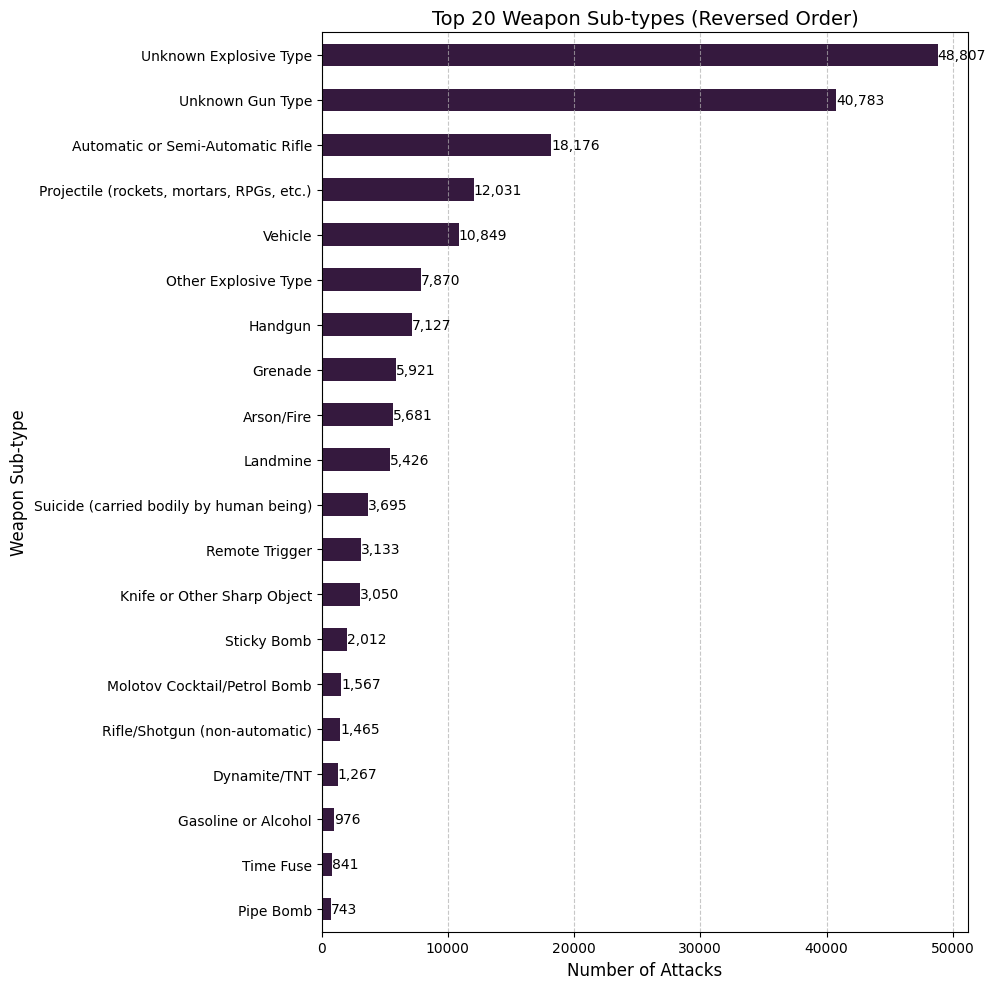

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  # For nicer color palettes

# Assuming your DataFrame is named 'df'
top_n_subtypes = 20
top_subtypes = df['weapsubtype1_txt'].value_counts().nlargest(top_n_subtypes).iloc[::-1]  # Reverse the Series

plt.figure(figsize=(10, 10))  # Adjust figure size
sns.set_palette("rocket")  # Use Seaborn color palette
bars = top_subtypes.plot(kind='barh', edgecolor='none')  # Horizontal bars

plt.title(f'Top {top_n_subtypes} Weapon Sub-types (Reversed Order)', fontsize=14)
plt.xlabel('Number of Attacks', fontsize=12)
plt.ylabel('Weapon Sub-type', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Add number of data points to the right of each bar
for bar in bars.patches:
    width = bar.get_width()
    plt.text(width + 3,  # Slightly to the right of the bar
             bar.get_y() + bar.get_height() / 2,
             f'{int(width):,}',
             ha='left', va='center',
             fontsize=10, color='black')  # Use black for visibility

plt.tight_layout()
plt.show()

# Word Cloud of Weapon Sub-types

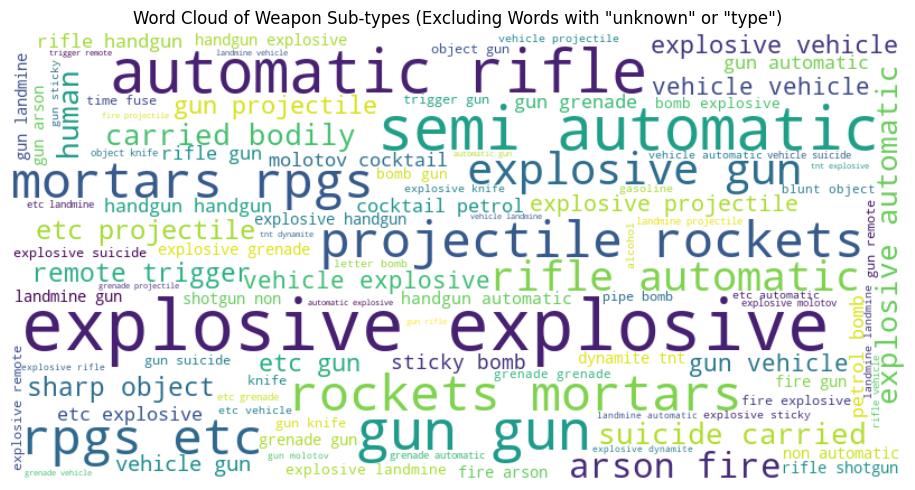

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Assuming your DataFrame is named 'df'

# Handle potential NaN values
weapon_subtypes_cleaned = df['weapsubtype1_txt'].dropna().astype(str)

filtered_words = []
for subtype in weapon_subtypes_cleaned:
    words = subtype.lower().split()  # Convert to lowercase and split into words
    for word in words:
        if "unknown" not in word and "type" not in word:
            filtered_words.append(word)

text = " ".join(filtered_words)

wordcloud = WordCloud(
    width=800,
    height=400,
    background_color="white",
    max_words=100,
    colormap="viridis",
    random_state=42,
).generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Weapon Sub-types (Excluding Words with "unknown" or "type")')
plt.tight_layout()
plt.show()

## Weapon Types Over Time (Dynamic)

In [37]:
import pandas as pd
from bokeh.plotting import figure, show
from bokeh.models import (
    ColumnDataSource, Slider, NumeralTickFormatter,
    Legend, LegendItem, HoverTool, CustomJS, Range1d, Div
)
from bokeh.layouts import column
from bokeh.io import output_notebook, save, output_file
from bokeh.transform import factor_cmap
from bokeh.palettes import Category10, Category20

# Show output in notebook
output_notebook()

# Ensure 'iyear' is integer
df['iyear'] = df['iyear'].astype(int)

# Group by year and weapon type and count occurrences
weapon_counts = df.groupby(['iyear', 'weaptype1_txt']).size().reset_index(name='count')

# Keep only years that have data
valid_years = sorted(weapon_counts['iyear'].unique().tolist())

# Get weapon types
weapon_types = weapon_counts['weaptype1_txt'].unique().tolist()
num_weapon_types = len(weapon_types)

# Choose palette
palette = Category10[num_weapon_types] if num_weapon_types <= 10 else Category20[min(num_weapon_types, 20)]

# Initial data load
initial_year = valid_years[0]
initial_data = weapon_counts[weapon_counts['iyear'] == initial_year]

# ColumnDataSource
source = ColumnDataSource(data=dict(
    years=initial_data['iyear'].tolist(),
    weapon_types=initial_data['weaptype1_txt'].tolist(),
    counts=initial_data['count'].tolist(),
))

# Create figure
p = figure(
    height=350,
    sizing_mode='stretch_width',
    title="Weapon Types Over Time",
    x_axis_label="Weapon Type",
    y_axis_label="Number of Incidents",
    x_range=weapon_types,
)
p.y_range = Range1d(start=0, end=initial_data['count'].max() * 1.1)

# Bars
bars = p.vbar(
    x='weapon_types',
    top='counts',
    width=0.9,
    source=source,
    line_color='white',
    fill_color=factor_cmap('weapon_types', palette=palette, factors=weapon_types),
)

# Legend
legend_items = [
    LegendItem(label=wtype, renderers=[bars], index=i)
    for i, wtype in enumerate(weapon_types)
]
legend = Legend(items=legend_items, location="center")
p.add_layout(legend, 'right')

# Hover tool
hover = HoverTool(
    tooltips=[
        ("Weapon Type", "@weapon_types"),
        ("Count", "@counts"),
    ],
    mode='vline',
    renderers=[bars]
)
p.add_tools(hover)

# Style
p.xgrid.grid_line_color = None
p.yaxis.formatter = NumeralTickFormatter(format="0")
p.xaxis.major_label_orientation = 0.8

# Slider (with index) and year display
year_slider = Slider(
    start=0,
    end=len(valid_years) - 1,
    step=1,
    value=0,
    title=None,  # Remove label to avoid double display
)

year_display = Div(text=f"<b>Year: {initial_year}</b>")

# JavaScript callback
callback = CustomJS(
    args=dict(
        source=source,
        weapon_counts_df=weapon_counts.to_json(orient='records'),
        y_range=p.y_range,
        year_display=year_display,
        valid_years=valid_years,
    ),
    code="""
    const data = JSON.parse(weapon_counts_df);
    const yearIndex = cb_obj.value;
    const selected_year = valid_years[yearIndex];
    const new_data = {'years': [], 'weapon_types': [], 'counts': []};
    let max_count = 0;

    for (let i = 0; i < data.length; i++) {
        if (data[i]['iyear'] === selected_year) {
            new_data['years'].push(data[i]['iyear']);
            new_data['weapon_types'].push(data[i]['weaptype1_txt']);
            new_data['counts'].push(data[i]['count']);
            if (data[i]['count'] > max_count) {
                max_count = data[i]['count'];
            }
        }
    }

    source.data = new_data;
    y_range.end = Math.ceil(max_count * 1.1);
    year_display.text = "<b>Year: " + selected_year + "</b>";
    """
)
year_slider.js_on_change('value', callback)

# Layout
layout = column(year_display, year_slider, p, sizing_mode='stretch_width')

# Show in notebook
show(layout)

output_file("weapon_types_over_time.html", title="Weapon Types Over Time")

# Optionally save as HTML
save(layout, filename="weapon_types_over_time.html")


Loading BokehJS ...

'/Users/jonas/Documents/code/temp/socialdata2025/notebooks/jonas/weapon_types_over_time.html'

## Top Perpetrator Groups Over Time

Unknown group is skipped

In [36]:
import pandas as pd
from bokeh.plotting import figure, show
from bokeh.models import NumeralTickFormatter, HoverTool, Legend, LegendItem
from bokeh.layouts import column
from bokeh.io import output_notebook, output_file, save
from bokeh.palettes import Category20

# Assuming your DataFrame is named 'df'
# Ensure 'iyear' is an integer
df['iyear'] = df['iyear'].astype(int)

# Get the top N perpetrator groups (overall), excluding "Unknown"
top_n = 10
group_counts_all = df['gname'].value_counts()
filtered_counts = group_counts_all[group_counts_all.index != "Unknown"]
top_groups = filtered_counts.nlargest(top_n).index.tolist()
df_filtered = df[df['gname'].isin(top_groups)].copy()

# Group by year and group name, counting attacks
group_counts = df_filtered.groupby(['iyear', 'gname']).size().reset_index(name='attack_count')

# Get all unique years for the x-axis range
years = sorted(df['iyear'].unique())
min_year = min(years)
max_year = max(years)

# Create the Bokeh figure
p = figure(
    height=350,
    sizing_mode='stretch_width',
    title=f"Trend of Top {top_n} Perpetrator Groups Over Time (Excluding Unknown)",
    x_axis_label="Year",
    y_axis_label="Number of Attacks",
    x_range=(min_year, max_year),
)

# Add line renderers for each group and prepare for legend
palette = Category20[top_n]
legend_items = []

for i, group in enumerate(top_groups):
    group_data = group_counts[group_counts['gname'] == group]
    renderer = p.line(
        x=group_data['iyear'],
        y=group_data['attack_count'],
        line_width=2,
        color=palette[i % len(palette)],
        alpha=0.8,
    )
    legend_items.append(LegendItem(label=group, renderers=[renderer]))

# Customize appearance
p.xgrid.grid_line_color = None
p.y_range.start = 0
p.yaxis.formatter = NumeralTickFormatter(format="0")

# Add custom legend to the right
legend = Legend(items=legend_items)
p.add_layout(legend, 'right')
legend.click_policy = "hide"

# Add hover tool
hover = HoverTool(
    tooltips=[
        ("Year", "$x"),
        ("Attacks", "$y"),
    ],
    mode="mouse",
)
p.add_tools(hover)

# Arrange layout (just the plot)
layout = column(p, sizing_mode='stretch_width')

# Output to Jupyter Notebook
output_notebook()
show(layout)

# Save as standalone HTML file
output_file("top_groups_over_time_static_no_unknown.html", title="Top Perpetrator Groups Over Time")
save(layout)


Loading BokehJS ...

'/Users/jonas/Documents/code/temp/socialdata2025/notebooks/jonas/top_groups_over_time_static_no_unknown.html'